# 3.1 - İstatistik'e Giriş: Temel İstatistik Kavramları

## Soru 1:
numpy kütüphanesini kullanarak üreteceğiniz 3 farklı veri aracılığı ile merkezi eğilim ve dağılım ölçümlerini hem yukarıda verilen matematiksel formülle hem de Python'da hazır bulunan (built-in) kodlar aracılığıyla analiz edin. <br>


***Build-in Version***

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

In [14]:
car = pd.DataFrame()
car["Year"] = np.random.normal(1980, 40, 100)
car["Fault"] = np.random.normal(42, 20, 100)
car["Distance"] = np.random.normal(120_000, 10000, 100)

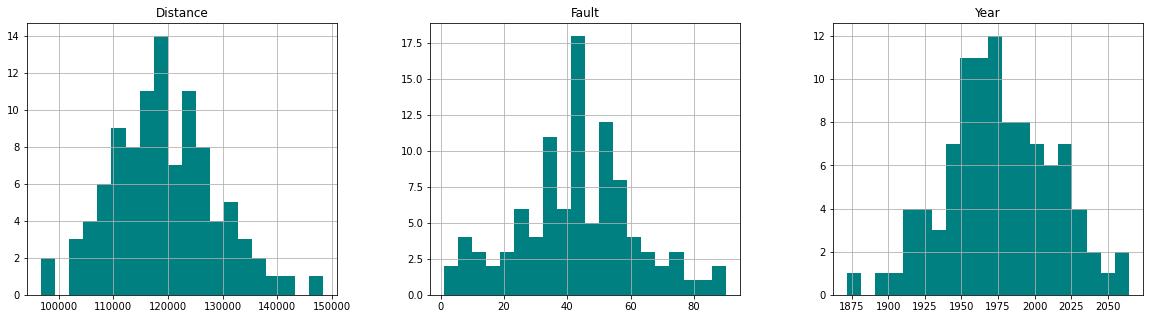

In [15]:
car.hist(layout=(1,3), sharey=False, figsize=(20,5), color="teal", bins=20)
plt.show()

In [16]:
# mean values with numpy
d_mean_np = np.mean(car["Distance"])
f_mean_np = np.mean(car.Fault)
y_mean_np = np.mean(car["Year"])

print(f"Mean value of Distance: {d_mean_np:.2f}")
print(f"Mean value of Fault: {f_mean_np:.2f}")
print(f"Mean value of Year: {y_mean_np:.2f}")

Mean value of Distance: 119198.91
Mean value of Fault: 42.99
Mean value of Year: 1976.04


In [17]:
# median values with numpy & statistics
d_med_np = np.median(car["Distance"])
f_med_np = np.median(car.Fault)
y_med_stat = stat.median(car["Year"])

print(f"Median value of Distance: {d_med_np:.2f}")
print(f"Median value of Fault: {f_med_np:.2f}")
print(f"Median value of Year: {y_med_stat:.2f}")

Median value of Distance: 118355.27
Median value of Fault: 43.17
Median value of Year: 1972.26


In [18]:
# mode values with statistics module
d_mod_stat = stat.mode(car["Distance"])
f_mod_stat = stat.mode(car.Fault)
y_mod_stat = stat.mode(car["Year"])

print(f"Mode of Distance: {d_mod_stat:.2f}")
print(f"Mode of Fault: {f_mod_stat:.2f}")
print(f"Mode of Year: {y_mod_stat:.2f}")

Mode of Distance: 114772.37
Mode of Fault: 26.15
Mode of Year: 1996.30


In [19]:
# variance values with numpy & pandas
d_var_np = np.var(car["Distance"], ddof=1)
f_var_pd = car.Fault.var()
y_var_np = np.var(car["Year"], ddof=1)

print(f"Variance of Distance: {d_var_np:.2f}")
print(f"Variance of Fault: {f_var_pd:.2f}")
print(f"Variance of Year: {y_var_np:.2f}")

Variance of Distance: 90777065.18
Variance of Fault: 342.49
Variance of Year: 1377.04


In [20]:
# standard deviation values with numpy & pandas
d_std_np = np.std(car["Distance"], ddof=1)
f_std_pd = car.Fault.std()
y_std_np = np.std(car["Year"], ddof=1)

print(f"Standard Deviation of Distance: {d_std_np:.2f}")
print(f"Standard Deviation of Fault: {f_std_pd:.2f}")
print(f"Standard Deviation of Year: {y_std_np:.2f}")

Standard Deviation of Distance: 9527.70
Standard Deviation of Fault: 18.51
Standard Deviation of Year: 37.11


In [21]:
# standard error values with numpy & pandas
d_ste_np = np.std(car["Distance"], ddof=1) / np.sqrt(len(car.Distance))
f_ste_pd = car.Fault.std() / np.sqrt(len(car.Fault))
y_ste_np = np.std(car["Year"], ddof=1) / np.sqrt(len(car.Year))

print(f"Standard Error of Distance: {d_ste_np:.2f}")    # bunu, ders notlarındaki gibi % bir değere nasıl çeviriyoruz?
print(f"Standard Error of Fault: {f_ste_pd:.2f}")
print(f"Standard Error of Year: {y_ste_np:.2f}")

Standard Error of Distance: 952.77
Standard Error of Fault: 1.85
Standard Error of Year: 3.71


***Pure Python Version***

In [22]:
distance = list(car.Distance)
fault = list(car.Fault)
year = list(car["Year"])

In [23]:
class Stat:
    def __init__(self, data):
        self.d = data
    
    def mean(self):    # mean value        
        return (sum(self.d) / len(self.d))
    
    def med(self):    # median value
        self.d.sort()
        if len(self.d)%2==1:
            return self.d[len(self.d)//2]
        else:
            return (self.d[len(self.d)//2]+self.d[len(self.d)//2-1])/2
        
    def mode(self):    # mode value
        counter={}
        for i in self.d:
            counter[self.d.count(i)]=i
        return counter[ max(counter.keys()) ]    ### sanırım küsüratlardan dolayı tüm verileri 1 adet sayıyor ve doğru sonucu vermiyor. ###
    
    def variance(self):    # variance value
        total = []
        for i in self.d:
            total.append((i - Stat.mean(self))**2)
        return (sum(total))/(len(self.d)-1)
    
    def stdev(self):    # standart deviation
        return (Stat.variance(self))**0.5
    
    def sterr(self):    # standart error
        return Stat.stdev(self)/(len(self.d)**0.5)


print("Mean value of Distance: {:.2f}".format( Stat(distance).mean() ))
print("Mean value of Fault: {:.2f}".format( Stat(fault).mean() ))
print("Mean value of Year: {:.2f}".format( Stat(year).mean() ))
print("")
print("Median value of Distance: {:.2f}".format( Stat(distance).med() ))
print("Median value of Fault: {:.2f}".format( Stat(fault).med() ))
print("Median value of Year: {:.2f}".format( Stat(year).med() ))
print("")
print("Mode of Distance: {:.2f}".format( Stat(distance).mode() ))
print("Mode of Fault: {:.2f}".format( Stat(fault).mode() ))
print("Mode of Year: {:.2f}".format( Stat(year).mode() ))
print("")
print("Variance of Distance: {:.2f}".format( Stat(distance).variance() ))
print("Variance of Fault: {:.2f}".format( Stat(fault).variance() ))
print("Variance of Year: {:.2f}".format( Stat(year).variance() ))
print("")
print("Standart Deviation of Distance: {:.2f}".format( Stat(distance).stdev() ))
print("Standart Deviation of Fault: {:.2f}".format( Stat(fault).stdev() ))
print("Standart Deviation of Year: {:.2f}".format( Stat(year).stdev() ))
print("")
print("Standart Error of Distance: {:.2f}".format( Stat(distance).sterr() ))
print("Standart Error of Fault: {:.2f}".format( Stat(fault).sterr() ))
print("Standart Error of Year: {:.2f}".format( Stat(year).sterr() ))

Mean value of Distance: 119198.91
Mean value of Fault: 42.99
Mean value of Year: 1976.04

Median value of Distance: 118355.27
Median value of Fault: 43.17
Median value of Year: 1972.26

Mode of Distance: 148329.01
Mode of Fault: 90.08
Mode of Year: 2064.34

Variance of Distance: 90777065.18
Variance of Fault: 342.49
Variance of Year: 1377.04

Standart Deviation of Distance: 9527.70
Standart Deviation of Fault: 18.51
Standart Deviation of Year: 37.11

Standart Error of Distance: 952.77
Standart Error of Fault: 1.85
Standart Error of Year: 3.71


**Check Point: "Build-in" vs "Pure Python"**

In [24]:
print("The values are for 'Distance', 'Fault' and 'Year' respectively.\n")
print("Mean values are equal :", round(d_mean_np,2)==round(Stat(distance).mean(), 2))
print("Mean values are equal :", round(f_mean_np,2)==round(Stat(fault).mean(), 2))
print("Mean values are equal :", round(y_mean_np,2)==round(Stat(year).mean(), 2))
print("")
print("Median values are equal :", round(d_med_np,2)==round(Stat(distance).med(), 2))
print("Median values are equal :", round(f_med_np,2)==round(Stat(fault).med(), 2))
print("Median values are equal :", round(y_med_stat,2)==round(Stat(year).med(), 2))
print("")
print("Modes are equal :", round(d_mod_stat,2)==round(Stat(distance).mode(), 2))
print("Modes are equal :", round(f_mod_stat,2)==round(Stat(fault).mode(), 2))
print("Modes are equal :", round(y_mod_stat,2)==round(Stat(year).mode(), 2))
print("")
print("Variance values are equal :", round(d_var_np,2)==round(Stat(distance).variance(), 2))
print("Variance values are equal :", round(f_var_pd,2)==round(Stat(fault).variance(), 2))
print("Variance values are equal :", round(y_var_np,2)==round(Stat(year).variance(), 2))
print("")
print("Standart deviation values are equal :", round(d_std_np,2)==round(Stat(distance).stdev(), 2))
print("Standart deviation values are equal :", round(f_std_pd,2)==round(Stat(fault).stdev(), 2))
print("Standart deviation values are equal :", round(y_std_np,2)==round(Stat(year).stdev(), 2))
print("")
print("Standart error values are equal :", round(d_ste_np,2)==round(Stat(distance).sterr(), 2))
print("Standart error values are equal :", round(f_ste_pd,2)==round(Stat(fault).sterr(), 2))
print("Standart error values are equal :", round(y_ste_np,2)==round(Stat(year).sterr(), 2))

The values are for 'Distance', 'Fault' and 'Year' respectively.

Mean values are equal : True
Mean values are equal : True
Mean values are equal : True

Median values are equal : True
Median values are equal : True
Median values are equal : True

Modes are equal : False
Modes are equal : False
Modes are equal : False

Variance values are equal : True
Variance values are equal : True
Variance values are equal : True

Standart deviation values are equal : True
Standart deviation values are equal : True
Standart deviation values are equal : True

Standart error values are equal : True
Standart error values are equal : True
Standart error values are equal : True
